In [2]:
import numpy as np
import pandas as pd

In [ ]:
rideshares = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\fhvhv_tripdata_2023-01.parquet')

In [13]:
rideshares.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [46]:
rideshares['Month'] = rideshares['dropoff_datetime'].dt.month
rideshares['Day'] = rideshares['dropoff_datetime'].dt.day
rideshares['Hour'] = rideshares['dropoff_datetime'].dt.hour


In [48]:
rideshares.head(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,Month,Day,Hour
0,HV0003,B03404,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,...,5.22,27.83,N,N,,N,N,1,1,0
1,HV0003,B03404,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,...,0.00,50.15,N,N,,N,N,1,1,1
2,HV0003,B03404,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,...,0.00,20.22,N,N,,N,N,1,1,0
3,HV0003,B03404,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,...,0.00,7.90,N,N,,N,N,1,1,0
4,HV0003,B03404,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,...,0.00,16.48,N,N,,N,N,1,1,1


In [51]:
rideshares_grouped = rideshares.groupby(['PULocationID', 'DOLocationID', 'Month', 'Day','Hour']).agg(
    trip_miles_sum=pd.NamedAgg(column='trip_miles', aggfunc='sum'),
    congestion_surcharge_sum=pd.NamedAgg(column='congestion_surcharge', aggfunc='sum'),
    tips_sum=pd.NamedAgg(column='tips', aggfunc='sum'),
    driver_pay_sum=pd.NamedAgg(column='driver_pay', aggfunc='sum'),
    trips=pd.NamedAgg(column='trip_miles', aggfunc='count')
)


In [55]:
rideshares_grouped = rideshares_grouped.reset_index()

In [34]:
rideshares_grouped.sort_values(by ='row_count', ascending = False)

trip_miles_sum  \
PULocationID DOLocationID dropoff_datetime dropoff_datetime dropoff_datetime                      
230          246          2023-01-31       2023-01-17       2023-01-17 09:00:00         426.756   
                                           2023-01-16       2023-01-16 09:00:00         419.483   
26           26           2023-01-31       2023-01-25       2023-01-25 14:00:00         267.643   
230          246          2023-01-31       2023-01-16       2023-01-16 08:00:00         331.017   
             265          2023-01-31       2023-01-26       2023-01-26 22:00:00        5175.581   
...                                                                                         ...   
123          133          2023-01-31       2023-01-16       2023-01-16 13:00:00           4.350   
                                                            2023-01-16 15:00:00           3.353   
                                                            2023-01-16 18:00:00           3.255   
                                                            2023-01-16 20:00:00           2.149   
265          265          2023-01-31       2023-01-31       2023-01-31 22:00:00           1.961   

                                                                                 congestion_surcharge_sum  \
PULocationID DOLocationID dropoff_datetime dropoff_datetime dropoff_datetime                                
230          246          2023-01-31       2023-01-17       2023-01-17 09:00:00                    858.00   
                                           2023-01-16       2023-01-16 09:00:00                    822.25   
26           26           2023-01-31       2023-01-25       2023-01-25 14:00:00                      0.00   
230          246          2023-01-31       2023-01-16       2023-01-16 08:00:00                    709.50   
             265          2023-01-31       2023-01-26       2023-01-26 22:00:00                    192.50   
...                                                                                                   ...   
123          133          2023-01-31       2023-01-16       2023-01-16 13:00:00                      0.00   
                                                            2023-01-16 15:00:00                      0.00   
                                                            2023-01-16 18:00:00                      0.00   
                                                            2023-01-16 20:00:00                      0.00   
265          265          2023-01-31       2023-01-31       2023-01-31 22:00:00                      0.00   

                                                                                 tips_sum  \
PULocationID DOLocationID dropoff_datetime dropoff_datetime dropoff_datetime                
230          246          2023-01-31       2023-01-17       2023-01-17 09:00:00    528.87   
                                           2023-01-16       2023-01-16 09:00:00    465.41   
26           26           2023-01-31       2023-01-25       2023-01-25 14:00:00     23.34   
230          246          2023-01-31       2023-01-16       2023-01-16 08:00:00    408.83   
             265          2023-01-31       2023-01-26       2023-01-26 22:00:00   1504.33   
...                                                                                   ...   
123          133          2023-01-31       2023-01-16       2023-01-16 13:00:00      0.00   
                                                            2023-01-16 15:00:00      0.00   
                                                            2023-01-16 18:00:00      0.00   
                                                            2023-01-16 20:00:00      0.00   
265          265          2023-01-31       2023-01-31       2023-01-31 22:00:00      0.00   

                                                                                 driver_pay_sum  \
PULocationID DOLocationID dropoff_datetime dropoff_datetime dropof

In [62]:
ridestoairport = rideshares_grouped.loc[(rideshares_grouped['DOLocationID']==1) | (rideshares_grouped['DOLocationID']==132) | (rideshares_grouped['DOLocationID']==138),:]

,PULocationID,DOLocationID,Month,Day,Hour,trip_miles_sum,congestion_surcharge_sum,tips_sum,driver_pay_sum,trips
0,1,1,1,12,15,0.000,0.00,0.0,9.16,1
1,1,1,1,16,6,1.520,0.00,0.0,9.15,1
2,1,1,1,17,16,0.010,0.00,0.0,96.74,1
3,1,1,1,31,6,0.000,0.00,0.0,66.21,1
13,2,138,1,30,17,15.150,0.00,3.0,35.02,1
...,...,...,...,...,...,...,...,...,...,...
6678372,265,138,1,5,7,13.950,0.00,0.0,29.37,1
6678373,265,138,1,17,15,13.620,2.75,5.0,15.52,1
6678374,265,138,1,19,17,12.793,0.00,0.0,33.07,1
6678375,265,138,1,24,15,14.590,0.00,0.0,31.02,1


In [113]:
ridestoairport.to_csv(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\ridestoairport.csv', index=False)

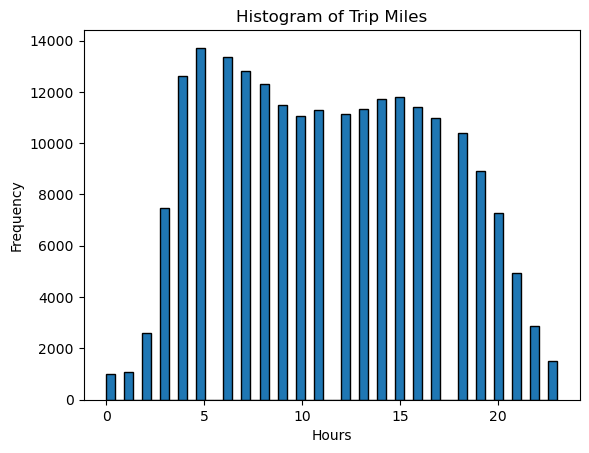

In [64]:
Hours = ridestoairport['Hour']
import numpy as np
import matplotlib.pyplot as plt

plt.hist(Hours, bins=50, edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.show()
#rides to airport happen pretty much throughout the day witdropoff in the nighttime

In [109]:
linegraphday = ridestoairport.groupby(['Day']).sum()['trips']

In [110]:
linegraphday = pd.DataFrame(linegraphday).reset_index()

In [111]:
linegraphday

,Day,trips
0,1,22953
1,2,27704
2,3,25995
3,4,22986
4,5,23569
5,6,23972
6,7,20760
7,8,28352
8,9,25865
9,10,21313


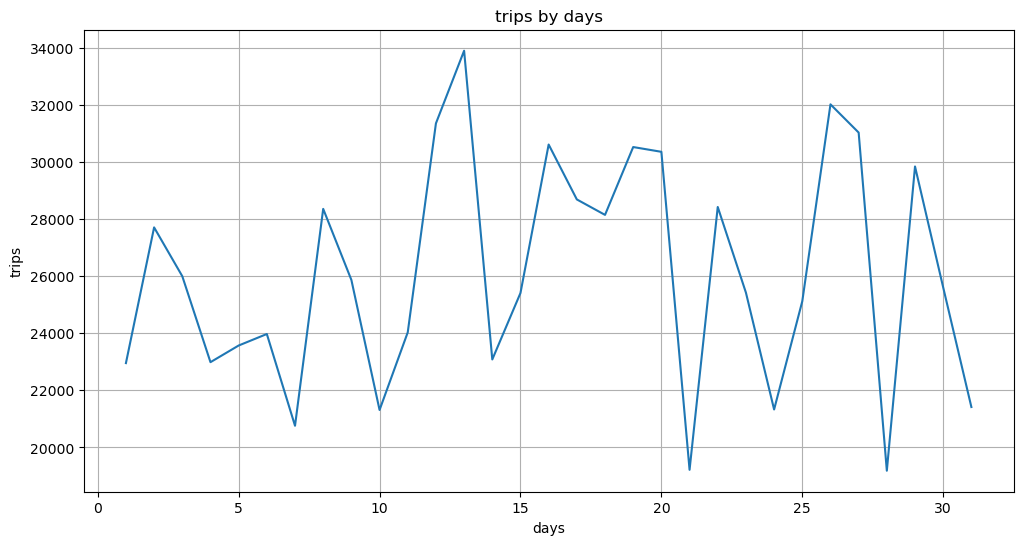

In [112]:
Days = linegraphday['Day']
Trips = linegraphday['trips']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Days, Trips)

ax.set(xlabel='days', ylabel='trips',
       title='trips by days')
ax.grid()
plt.show()